In [1]:
import numpy as np
import pandas as pd 
import scipy.sparse as ssp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [2]:
orders = pd.read_csv("/home/metri/Desktop/DA/project/all/orders.csv")
train_orders = pd.read_csv("/home/metri/Desktop/DA/project/all/order_products__train.csv")
prior_orders = pd.read_csv("/home/metri/Desktop/DA/project/all/order_products__prior.csv")
products = pd.read_csv("/home/metri/Desktop/DA/project/all/products.csv")

In [3]:
final_df = prior_orders[0:1000000]
final_df = final_df[final_df["reordered"]==1]
final_df = pd.merge(final_df,orders,on='order_id',how='left')
final_df = pd.merge(final_df,products,on='product_id',how='left')
final_df[['user_id','order_id','product_id','product_name','reordered']].head()

,user_id,order_id,product_id,product_name,reordered
0,202279,2,33120,Organic Egg Whites,1
1,202279,2,28985,Michigan Organic Kale,1
2,202279,2,45918,Coconut Butter,1
3,202279,2,17794,Carrots,1
4,202279,2,40141,Original Unflavored Gelatine Mix,1


In [4]:
final_df["product_name"] = final_df["product_name"].astype(str)
df = final_df.groupby("user_id").apply(lambda order: order['product_name'].tolist()).reset_index()
df.columns = ['user_id', 'product_set']
df["product_set"] = df["product_set"].astype(str)
df.head()

,user_id,product_set
0,7,"['85% Lean Ground Beef', 'Organic Apple Slices..."
1,10,"['Asparagus', 'Fresh Cauliflower', 'Original H..."
2,13,"['Half & Half', 'Whole Wheat Pita Bread Loaves..."
3,19,"['100% Juice Apple Juice', 'Shredded Sharp Che..."
4,21,"['Organic Gala Apples', 'Eggs, Hard-Boiled', '..."


In [5]:
tfidf = TfidfVectorizer(min_df=5, max_features=1000, strip_accents='unicode',lowercase =True, \
                        analyzer='word', token_pattern=r'\w+', use_idf=True, smooth_idf=True,  \
                        sublinear_tf=True, stop_words = 'english')
tfidf.fit(df['product_set'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w+', tokenizer=None, use_idf=True,
        vocabulary=None)

In [6]:
text = tfidf.transform(df['product_set'])
svd = TruncatedSVD(n_components=2)
text = svd.fit_transform(text)
text = pd.DataFrame(text)
text.columns = ['pf_0','pf_1']
text['user_id'] = df.user_id
text.head()

,pf_0,pf_1,user_id
0,0.248597,0.002048,7
1,0.280489,0.153890,10
2,0.095395,-0.037035,13
3,0.138116,-0.057900,19
4,0.272648,-0.089055,21


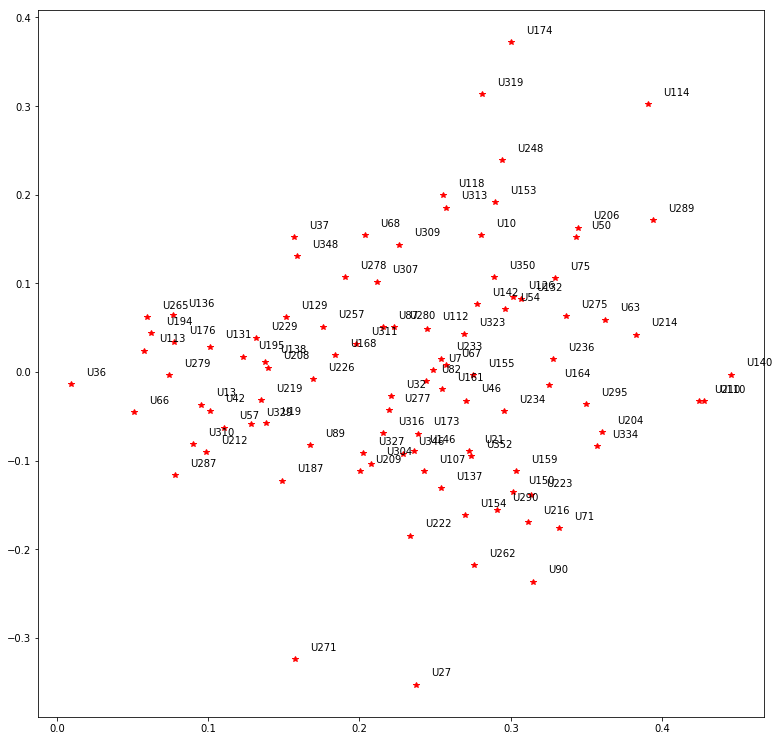

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))
plt.plot(text['pf_0'].head(100),text['pf_1'].head(100),'r*',label=text['user_id'].head(100), color = 'red')
for row in text.head(100).itertuples():
    plt.annotate('U'+str(row.user_id), xy=(row.pf_0,row.pf_1), xytext=(row.pf_0+0.01,row.pf_1+0.01))
plt.show()